Problem 2


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [36]:
n = 100
lambda_s = [1, 10, 100, 1000]
alpha_s = [1, 10, 100, 1000]
beta_s = np.logspace(0, 3, 50)

In [37]:
def mse(lam, alpha, beta, n):
    return (n * lam + (alpha - lam * beta) ** 2) / (n + beta) ** 2   # from the formula we calculated in theory

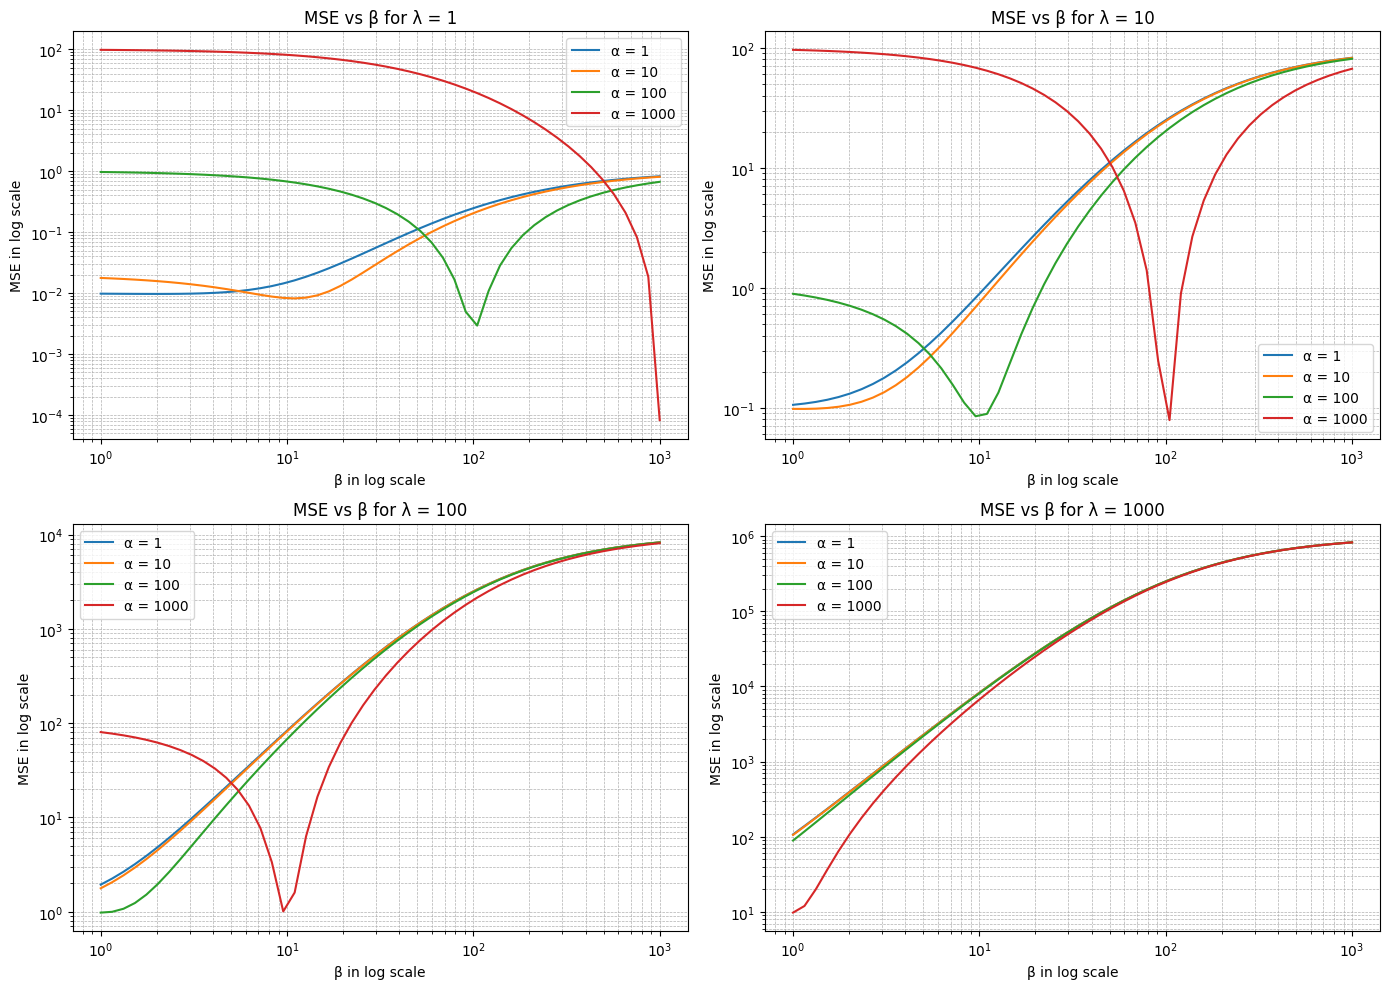

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, lam in enumerate(lambda_s):
    ax = axes[idx]
    for alpha in alpha_s:
        ax.plot(beta_s, mse(lam, alpha, beta_s, n), label=f"α = {alpha}")  # same logic

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("β in log scale")
    ax.set_ylabel("MSE in log scale")
    ax.set_title(f"MSE vs β for λ = {lam}")
    ax.legend()
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


(ii) Main observations

-> For each
α, the MSE as a function of
β shows a U-shaped curve. (decreasing first and then increasing).

-> Increasing
β initially reduces variance. But for large
β, the bias term dominates more, threfore increasing MSE.

-> The value of
β that minimizes MSE depends on
λ and changes as
λ changes.

->For some
(α,β) choices, the MSE is lower than that of the sample mean estimator.

iii)
Yes, the empirical trends align with theory.

-> The observed U-shape confirms the bias–variance tradeoff logic.

->The optimal
β occurs near where the bias term in MSE
(α−λβ)^2
 is small, as predicted.

->Biased estimators can achieve lower MSE than the unbiased sample mean. Matches with theory.

Problem 3 i)

In [32]:
lam = 1
n = 10
N = 1000
alpha_s = [1, 10]
beta_s = [1, 10]
np.random.seed(42)

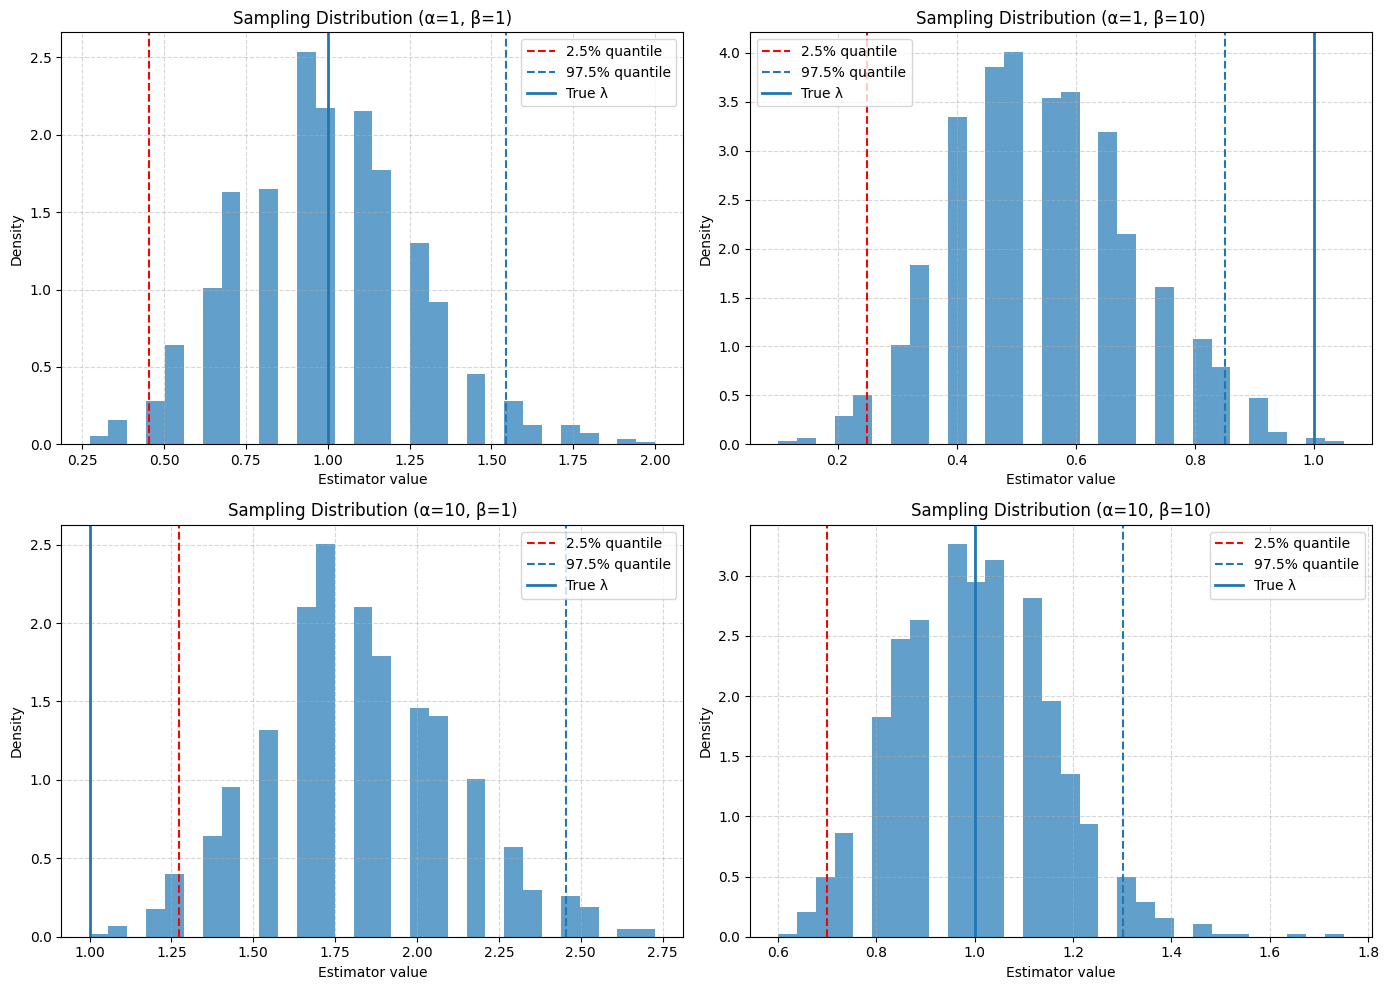

In [33]:
results = {}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
plot_idx = 0

for alpha in alpha_s:
    for beta in beta_s:
        estimates = []
        for i in range(N):
            X = np.random.poisson(lam, n)
            est = (np.sum(X) + alpha) / (n + beta)
            estimates.append(est)

        estimates = np.array(estimates)
        results[(alpha, beta)] = estimates

        # Sampling Confidence interval
        lower, upper = np.percentile(estimates, [2.5, 97.5])

        ax = axes[plot_idx]
        plot_idx += 1

        ax.hist(estimates, bins=30, density=True, alpha=0.7)
        ax.axvline(lower, linestyle='--', label='2.5% quantile', color='red')
        ax.axvline(upper, linestyle='--', label='97.5% quantile')
        ax.axvline(lam, linestyle='-', linewidth=2, label='True λ')

        ax.set_title(f"Sampling Distribution (α={alpha}, β={beta})")
        ax.set_xlabel("Estimator value")
        ax.set_ylabel("Density")
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



ii)$$
\hat{E}[\hat{\lambda}_{\alpha,\beta}]
= \frac{1}{N} \sum_{i=1}^{N} \hat{\lambda}_{\alpha,\beta}^{(i)},
\quad
\widehat{\mathrm{Var}}[\hat{\lambda}_{\alpha,\beta}]
= \frac{1}{N-1} \sum_{i=1}^{N} \left( \hat{\lambda}_{\alpha,\beta}^{(i)} - \hat{E}[\hat{\lambda}_{\alpha,\beta}] \right)^2
$$

$$
\text{Central 95% Wald CI:} \quad
\hat{E}[\hat{\lambda}_{\alpha,\beta}] \pm 1.96 \cdot \sqrt{\frac{\widehat{\mathrm{Var}}[\hat{\lambda}_{\alpha,\beta}]}{N}}
$$


In [34]:
rows=[]
for (alpha, beta), est in results.items():
    mean_est = np.mean(est)
    var_est = np.var(est, ddof=1)
    se = np.sqrt(var_est / N)
    wald_ci = (mean_est - 1.96*se, mean_est + 1.96*se)
    sampling_ci = np.percentile(est, [2.5, 97.5])

    rows.append({
        "alpha": alpha,
        "beta": beta,
        "Empirical Mean": mean_est,
        "Empirical Variance": var_est,
        "Wald CI": wald_ci,
        "Sampling CI": sampling_ci
    })
df = pd.DataFrame(rows)
df

,alpha,beta,Empirical Mean,Empirical Variance,Wald CI,Sampling CI
0,1,1,0.995000,0.075679,"(0.977949264139677, 1.0120507358603228)","[0.45454545454545453, 1.5454545454545454]"
1,1,10,0.547200,0.023696,"(0.5376590356957037, 0.5567409643042963)","[0.25, 0.85]"
2,10,1,1.817727,0.085101,"(1.7996461878751104, 1.8358083575794344)","[1.2727272727272727, 2.4545454545454546]"
3,10,10,1.001900,0.024956,"(0.9921085598544379, 1.0116914401455621)","[0.7, 1.301249999999999]"


(iii) Main observations

->The sampling distributions are centered at different values depending on
(α,β), showing bias.

->Increasing
β value reduces the variance of the estimator.

->The empirical mean and variance closely match the values predicted in theory.

->The sampling 95% Confidence interval is much wider than the Wald confidence interval.


(iv) Agreement with Problem 1

->Yes the Monte Carlo simulations agree with theoretical results from Problem 1.

->The observed bias matches the theoretical bias
(α−λβ)/(n+β).

->Variance decreases as
β increases, as we predicted.

->The bias–variance tradeoff is clearly visible in the simulations.

(v) Peculiar features

->The sampling distributions are discrete and slightly skewed.

->I guess it occurs because the estimator is based on sums of Poisson random variables.

->The sample size n=10, prevent the distribution from being approx. normal

->Thus, the Wald CI differs noticeably from the sampling CI.

